In [15]:
import pandas as pd
import numpy as np
import json
import openpyxl
import matplotlib.pyplot as plt
import scipy


ModuleNotFoundError: ignored

In [ ]:
news = pd.read_csv("weather_2012.csv")

FileNotFoundError: ignored

In [ ]:
print("Shape:", news.shape)
print("Index:", news.index)

Shape: (8784, 8)
Index: RangeIndex(start=0, stop=8784, step=1)


In [ ]:
news.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [ ]:
news['Date/Time'].head()

0    2012-01-01 00:00:00
1    2012-01-01 01:00:00
2    2012-01-01 02:00:00
3    2012-01-01 03:00:00
4    2012-01-01 04:00:00
Name: Date/Time, dtype: object

In [ ]:
news['Weather'].head()

0                     Fog
1                     Fog
2    Freezing Drizzle,Fog
3    Freezing Drizzle,Fog
4                     Fog
Name: Weather, dtype: object

In [ ]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date/Time           8784 non-null   object 
 1   Temp (C)            8784 non-null   float64
 2   Dew Point Temp (C)  8784 non-null   float64
 3   Rel Hum (%)         8784 non-null   int64  
 4   Wind Spd (km/h)     8784 non-null   int64  
 5   Visibility (km)     8784 non-null   float64
 6   Stn Press (kPa)     8784 non-null   float64
 7   Weather             8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [ ]:
news.tail()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,2012-12-31 23:00:00,0.0,-2.1,86,30,11.3,99.89,Snow


In [ ]:
news['Wind Spd (km/h)'].unique()

array([ 4,  7,  6,  9, 15, 13, 20, 22, 19, 24, 30, 35, 39, 32, 33, 26, 44,
       43, 48, 37, 28, 17, 11,  0, 83, 70, 57, 46, 41, 52, 50, 63, 54,  2])

In [ ]:
news['Wind Spd (km/h)'].value_counts()

9     830
11    791
13    735
15    719
7     677
17    666
19    616
6     609
20    496
4     474
22    439
24    374
0     309
26    242
28    205
30    161
32    139
33     85
35     53
37     45
39     24
41     22
44     14
43     13
48     13
46     11
52      7
57      5
50      4
2       2
83      1
70      1
63      1
54      1
Name: Wind Spd (km/h), dtype: int64

In [ ]:
news['Weather'].value_counts()[3]

1326

In [ ]:
col = news['Weather']

col.head(12)

0                      Fog
1                      Fog
2     Freezing Drizzle,Fog
3     Freezing Drizzle,Fog
4                      Fog
5                      Fog
6                      Fog
7                      Fog
8                      Fog
9                      Fog
10                     Fog
11                     Fog
Name: Weather, dtype: object

In [ ]:
news.loc[0:5, ['Rel Hum (%)',	'Wind Spd (km/h)']]

,Rel Hum (%),Wind Spd (km/h)
0,86,4
1,87,4
2,89,7
3,88,6
4,88,7
5,87,9


In [ ]:
snow = news['Weather'].str.lower().str.contains('snow')

In [ ]:
snow

0       False
1       False
2       False
3       False
4       False
        ...  
8779     True
8780     True
8781     True
8782     True
8783     True
Name: Weather, Length: 8784, dtype: bool

In [ ]:
news[snow]

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
41,2012-01-02 17:00:00,-2.1,-9.5,57,22,25.0,99.66,Snow Showers
44,2012-01-02 20:00:00,-5.6,-13.4,54,24,25.0,100.07,Snow Showers
45,2012-01-02 21:00:00,-5.8,-12.8,58,26,25.0,100.15,Snow Showers
47,2012-01-02 23:00:00,-7.4,-14.1,59,17,19.3,100.27,Snow Showers
48,2012-01-03 00:00:00,-9.0,-16.0,57,28,25.0,100.35,Snow Showers
...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [ ]:
df = pd.DataFrame({'date': ['3/10/2000', '3/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})

In [ ]:
df = pd.DataFrame({'date': ['3/10/2000', '3/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df

,date,value
0,2000-10-03,2
1,2000-11-03,3
2,2000-12-03,4


In [ ]:
df['date'] = pd.to_datetime(df['date'], format="%m-%d-%Y")
df

,date,value
0,2000-10-03,2
1,2000-11-03,3
2,2000-12-03,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    3 non-null      object
 1   value   3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


In [ ]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3 non-null      datetime64[ns]
 1   value   3 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 176.0 bytes


In [ ]:
df

,date,value
0,2000-03-10,2
1,2000-03-11,3
2,2000-03-12,4


In [ ]:
df = pd.DataFrame({'date': ['2016-6-10 20:30:0',
                            '2016-7-1 19:45:30',
                            '2013-10-12 4:5:1'],
                   'value': [2, 3, 4]})

In [ ]:
df['date'] = pd.to_datetime(df['date'], format="%y-%d-%m %H:%M:%S")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3 non-null      datetime64[ns]
 1   value   3 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 176.0 bytes


In [ ]:
cf = pd.read_csv('weather_2012.csv')

cf

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [ ]:
df = pd.DataFrame({'name': ['Tom', 'Andy', 'Lucas'],
                 'DoB': ['08-05-1997', '04-28-1996', '12-16-1995']})

In [ ]:
df

,name,DoB
0,Tom,08-05-1997
1,Andy,04-28-1996
2,Lucas,12-16-1995


In [ ]:
df['DoB'] = pd.to_datetime(df['DoB'])

In [ ]:
df

,name,DoB
0,Tom,1997-08-05
1,Andy,1996-04-28
2,Lucas,1995-12-16


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   name    3 non-null      object        
 1   DoB     3 non-null      datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 176.0+ bytes


In [ ]:
df['DoB'].dt.dayofweek




0    1
1    6
2    5
Name: DoB, dtype: int64

In [ ]:
pd.to_datetime('today').year - df['DoB'].dt.year

0    26
1    27
2    28
Name: DoB, dtype: int64

In [ ]:
df = pd.read_csv('city_sales.csv', parse_dates=['date'])

In [ ]:
df

,date,num,city
0,2015-01-01 09:00:00,4,London
1,2015-01-01 09:01:00,4,London
2,2015-01-01 09:02:00,3,London
3,2015-01-01 09:03:00,3,London
4,2015-01-01 09:04:00,3,London
...,...,...,...
376428,2018-06-06 09:54:00,3,London
376429,2018-06-06 09:55:00,3,London
376430,2018-06-06 09:56:00,3,London
376431,2018-06-06 09:57:00,3,London


In [ ]:
df = df.set_index(['date'])

In [ ]:
df

,num,city
date,,
2015-01-01 09:00:00,4,London
2015-01-01 09:01:00,4,London
2015-01-01 09:02:00,3,London
2015-01-01 09:03:00,3,London
2015-01-01 09:04:00,3,London
...,...,...
2018-06-06 09:54:00,3,London
2018-06-06 09:55:00,3,London
2018-06-06 09:56:00,3,London


In [ ]:
df.loc['2018', 'num'].sum()

132127

In [ ]:
df['2018'].groupby('city').sum()

<ipython-input-38-eb258b58c6c6>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2018'].groupby('city').sum()


,num
city,
London,132127


In [ ]:
df.loc['2018-5']

,num,city
date,,
2018-05-01 09:00:00,1,London
2018-05-01 09:01:00,4,London
2018-05-01 09:02:00,3,London
2018-05-01 09:03:00,2,London
2018-05-01 09:04:00,3,London
...,...,...
2018-05-31 15:56:00,3,London
2018-05-31 15:57:00,3,London
2018-05-31 15:58:00,4,London


In [ ]:
data = {
    "president": {
        "name": "Zaphod Beeblebrox",
        "species": "Betelgeusian"
    }
}

In [ ]:
with open("data_file.json", "w") as write_file:
  json.dump(data, write_file)

In [ ]:
data

{'president': {'name': 'Zaphod Beeblebrox', 'species': 'Betelgeusian'}}

In [ ]:
with open('data_file.json', 'r') as read_file:
  data = json.load(read_file)

In [ ]:
data

{'president': {'name': 'Zaphod Beeblebrox', 'species': 'Betelgeusian'}}

In [ ]:
jsonStr = '''{"Index0":{"Courses": "Pandas","Discount": "1200"},
           "Index1":{"Courses": "Hadoop","Discount": "1500"},
           "Index2":{"Courses": "Spark","Discount": "1800"}
          }'''

# Convert JSON to DataFrame Using read_json()
df2 = pd.read_json(jsonStr, orient ='index')
print(df2)

       Courses  Discount
Index0  Pandas      1200
Index1  Hadoop      1500
Index2   Spark      1800


In [ ]:
data['president']

{'name': 'Zaphod Beeblebrox', 'species': 'Betelgeusian'}

In [ ]:
df3 = pd.DataFrame.from_dict(data, orient ='index')


In [ ]:
df3

,name,species
president,Zaphod Beeblebrox,Betelgeusian


In [ ]:
from openpyxl import Workbook
workbook = Workbook()
sheet = workbook.active

sheet["A1"] = "hello"
sheet["B1"] = "world!"

workbook.save(filename="hello_world.xlsx")

FileNotFoundError: ignored

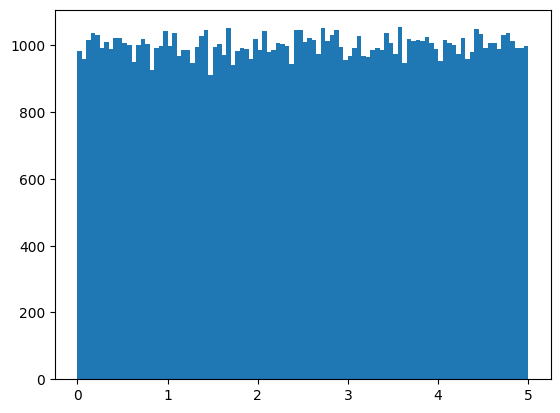

In [4]:
x = np.random.uniform(0.0, 5.0, 100000)

plt.hist(x, 100)
plt.show()

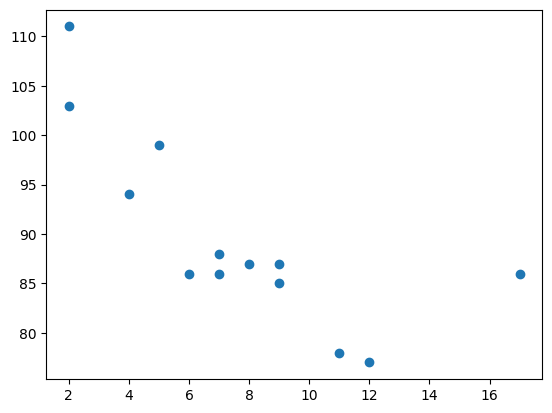

In [5]:
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

plt.scatter(x, y)
plt.show()

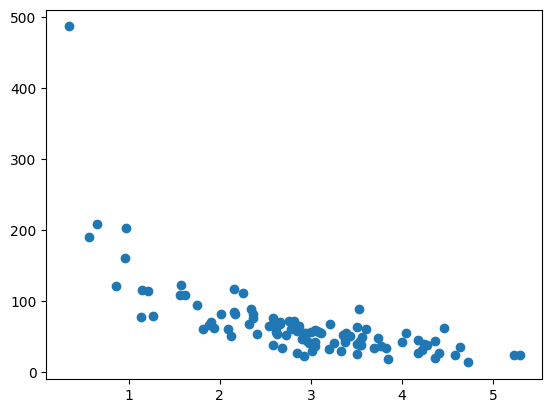

In [12]:
np.random.seed(2)

x = np.random.normal(3, 1, 100)
y = np.random.normal(150, 40, 100) / x

plt.scatter(x, y)
plt.show()

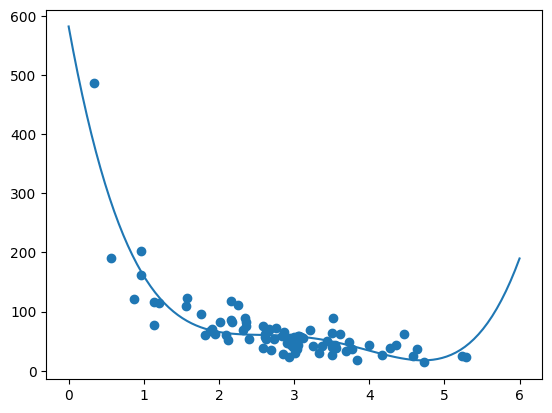

In [14]:
train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = np.poly1d(np.polyfit(train_x, train_y, 4))

myline = np.linspace(0, 6, 100)

plt.scatter(train_x, train_y)
plt.plot(myline, mymodel(myline))
plt.show()